<a href="https://colab.research.google.com/github/andreiaspi/bigdataforecast-2025/blob/main/forecast_lgbm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import glob

# Caminho da pasta no Google Drive
DATA_PATH = "/content/drive/MyDrive/desafiodata/"

# Lista todos os arquivos parquet da pasta
parquet_files = glob.glob(DATA_PATH + "*.parquet")

print(f"Arquivos encontrados: {len(parquet_files)}")
print(parquet_files)

# Carrega todos os arquivos em uma lista de DataFrames
df_list = [pd.read_parquet(f) for f in parquet_files]

# Exibe as primeiras colunas de cada arquivo para identificar
for i, df in enumerate(df_list):
    print(f"\nArquivo {i+1}: {parquet_files[i]}")
    print(df.head())
    print("Colunas:", df.columns.tolist())


Arquivos encontrados: 3
['/content/drive/MyDrive/desafiodata/part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet', '/content/drive/MyDrive/desafiodata/part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet', '/content/drive/MyDrive/desafiodata/part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet']

Arquivo 1: /content/drive/MyDrive/desafiodata/part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet
               produto          categoria  \
0  2282334733936076502  Distilled Spirits   
1  6091840953834683482  Distilled Spirits   
2  1968645851245092408  Distilled Spirits   
3   994706710729219179              Draft   
4  9209550539540384349        Non-Alcohol   

                              descricao              tipos          label  \
0           JOSEPH CARTRON CAFÉ LIQUEUR  Distilled Spirits           Core   
1  SP

In [24]:
import pandas as pd

# Caminho da pasta no Google Drive
DATA_PATH = "/content/drive/MyDrive/desafiodata/"

# Carregar os arquivos manualmente
df_products   = pd.read_parquet(DATA_PATH + "part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet")
df_stores     = pd.read_parquet(DATA_PATH + "part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet")
df_transactions = pd.read_parquet(DATA_PATH + "part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet")

print("✅ Arquivos carregados com sucesso!")

# Conferir os dataframes
print("\nProdutos:", df_products.shape)
print(df_products.head())

print("\nPDVs:", df_stores.shape)
print(df_stores.head())

print("\nTransações:", df_transactions.shape)
print(df_transactions.head())


✅ Arquivos carregados com sucesso!

Produtos: (7092, 8)
               produto          categoria  \
0  2282334733936076502  Distilled Spirits   
1  6091840953834683482  Distilled Spirits   
2  1968645851245092408  Distilled Spirits   
3   994706710729219179              Draft   
4  9209550539540384349        Non-Alcohol   

                              descricao              tipos          label  \
0           JOSEPH CARTRON CAFÉ LIQUEUR  Distilled Spirits           Core   
1  SPRINGBANK 18 YEAR SINGLE MALT 700ML  Distilled Spirits      Specialty   
2     J BRANDT TRIPLE SEC 12/750ML 30PF  Distilled Spirits  Private Label   
3      REFORMATION CASHMERE IPA 1/4 KEG              Draft         In&Out   
4               HELLA MOSCOW MULE 750ML        Non Alcohol           Core   

          subcategoria                               marca  \
0  Liqueurs & Cordials                 Joseph Cartron Cafe   
1        Scotch Whisky      Springbank 18 Year Single Malt   
2  Liqueurs & Cordials  

In [25]:
# Renomear colunas para facilitar joins
df_transactions = df_transactions.rename(columns={
    "internal_store_id": "pdv",
    "internal_product_id": "produto",
    "transaction_date": "data",
    "quantity": "quantidade"
})

# Ajusta data para datetime
df_transactions["data"] = pd.to_datetime(df_transactions["data"])

print("Colunas ajustadas em df_transactions:")
print(df_transactions.columns)


Colunas ajustadas em df_transactions:
Index(['pdv', 'produto', 'distributor_id', 'data', 'reference_date',
       'quantidade', 'gross_value', 'net_value', 'gross_profit', 'discount',
       'taxes'],
      dtype='object')


In [26]:
# 🔗 Merge das tabelas
df_merged = (
    df_transactions
    .merge(df_products, on="produto", how="left")   # adiciona info de produto
    .merge(df_stores, on="pdv", how="left")         # adiciona info de PDV
)

print("✅ Base final criada com sucesso!")
print("Formato:", df_merged.shape)
print(df_merged.head())


✅ Base final criada com sucesso!
Formato: (6560698, 21)
                   pdv              produto distributor_id       data  \
0  7384367747233276219   328903483604537190              9 2022-07-13   
1  3536908514005606262  5418855670645487653              5 2022-03-21   
2  3138231730993449825  1087005562675741887              6 2022-09-06   
3  3681167389484217654  1401422983880045188              5 2022-09-11   
4  7762413312337359369  6614994347738381720              4 2022-02-18   

  reference_date  quantidade  gross_value    net_value  gross_profit  \
0     2022-07-01         1.0    38.125000    37.890625     10.042625   
1     2022-03-01         6.0   107.250000   106.440002     24.732002   
2     2022-09-01         3.0    56.625000    56.220001     14.124002   
3     2022-09-01       129.0  1037.160023  1037.160023    156.348026   
4     2022-02-01         1.0    26.230000    23.950241      6.550241   

     discount  ...          categoria  \
0    3.950000  ...            P

In [27]:
# Cria coluna de semana (número da semana no ano)
df_merged["semana"] = df_merged["data"].dt.isocalendar().week

# Agrega vendas semanais por PDV e produto
df_weekly = (
    df_merged.groupby(["semana", "pdv", "produto"], as_index=False)
    .agg({"quantidade": "sum"})
)

# Ordena resultado
df_weekly = df_weekly.sort_values(["semana", "pdv", "produto"])

print("✅ Base semanal criada com sucesso!")
print(df_weekly.head())


✅ Base semanal criada com sucesso!
   semana                  pdv              produto  quantidade
0       1  1001371918471115422  1029370090212151375         2.0
1       1  1001371918471115422  1120490062981954254        18.0
2       1  1001371918471115422  2239307647969388381         2.0
3       1  1001371918471115422  4353552881410365573         7.0
4       1  1001371918471115422  4797439216678436447         1.0


In [28]:
# Exporta no formato oficial do desafio
df_weekly.to_csv("submissao_baseline.csv", sep=";", index=False, encoding="utf-8")

print("📂 Arquivo 'submissao_baseline.csv' gerado com sucesso!")


📂 Arquivo 'submissao_baseline.csv' gerado com sucesso!


In [29]:
import pandas as pd

# 🔹 Pega as últimas 5 semanas do histórico de 2022
ultimas_semanas = df_weekly["semana"].max()
df_last5 = df_weekly[df_weekly["semana"].between(ultimas_semanas-4, ultimas_semanas)]

# 🔹 Reindexa as semanas para 1..5 (Janeiro/2023)
df_last5 = df_last5.copy()
df_last5["semana"] = df_last5["semana"].rank(method="dense").astype(int)

# 🔹 Garante ordem
df_submissao = df_last5.sort_values(["semana", "pdv", "produto"])

# 🔹 Salva no formato oficial
df_submissao.to_csv("submissao_baseline.csv", sep=";", index=False, encoding="utf-8")

print("📂 Arquivo 'submissao_baseline.csv' pronto para submissão!")
print(df_submissao.head())


📂 Arquivo 'submissao_baseline.csv' pronto para submissão!
         semana                  pdv              produto  quantidade
5631028       1  1001371918471115422  1009179103632945474         1.0
5631029       1  1001371918471115422  1029370090212151375         4.0
5631030       1  1001371918471115422  1120490062981954254        10.0
5631031       1  1001371918471115422  1511339265769932881         2.0
5631032       1  1001371918471115422  1625722803643187564         1.0


In [31]:
!pip install prophet


In [32]:
from prophet import Prophet
import pandas as pd

# 1. Seleciona Top N produtos mais vendidos
top_products = (
    df_weekly.groupby("produto")["quantidade"]
    .sum()
    .nlargest(50)  # pode ajustar N
    .index
)

# Filtra apenas esses produtos
df_sample = df_weekly[df_weekly["produto"].isin(top_products)].copy()

# Lista para guardar previsões
pred_list = []

# 2. Loop por produto (pode ser SKU x PDV se quiser mais granular)
for produto_id in df_sample["produto"].unique():
    df_prod = df_sample[df_sample["produto"] == produto_id]

    # Prepara dados no formato Prophet
    df_prophet = df_prod.groupby("semana", as_index=False).agg({"quantidade":"sum"})
    df_prophet = df_prophet.rename(columns={"semana": "ds", "quantidade": "y"})

    # Prophet exige uma data real → mapeamos semanas para datas
    df_prophet["ds"] = pd.to_datetime("2022-01-01") + pd.to_timedelta((df_prophet["ds"]-1)*7, unit="D")

    # 3. Treina modelo Prophet
    model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
    model.fit(df_prophet)

    # 4. Faz previsão para +5 semanas
    future = model.make_future_dataframe(periods=5, freq="W")
    forecast = model.predict(future)

    # Seleciona apenas as últimas 5 semanas (previsão)
    forecast_tail = forecast.tail(5)[["ds", "yhat"]]
    forecast_tail["produto"] = produto_id
    forecast_tail["semana"] = range(1, 6)  # semanas jan/2023
    forecast_tail["yhat"] = forecast_tail["yhat"].clip(lower=0)  # evita valores negativos

    pred_list.append(forecast_tail[["semana", "produto", "yhat"]])

# Junta todas previsões
df_forecast = pd.concat(pred_list, ignore_index=True)
df_forecast = df_forecast.rename(columns={"yhat": "quantidade"})

# 5. Exporta no formato oficial (sem coluna pdv por enquanto)
df_forecast.to_csv("submissao_prophet.csv", sep=";", index=False, encoding="utf-8")

print("📂 Arquivo 'submissao_prophet.csv' gerado com sucesso!")
print(df_forecast.head())


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/ec877jsb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/unzloawd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33795', 'data', 'file=/tmp/tmp0hiao5q8/ec877jsb.json', 'init=/tmp/tmp0hiao5q8/unzloawd.json', 'output', 'file=/tmp/tmp0hiao5q8/prophet_modelwzmh7d8i/prophet_model-20250922165720.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:57:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:57:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/no0ye1dh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/oqinhne_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

📂 Arquivo 'submissao_prophet.csv' gerado com sucesso!
   semana              produto  quantidade
0       1  1029370090212151375         0.0
1       2  1029370090212151375         0.0
2       3  1029370090212151375         0.0
3       4  1029370090212151375         0.0
4       5  1029370090212151375         0.0


In [33]:
from prophet import Prophet

# Exemplo para 1 produto
produto_id = df_sample["produto"].unique()[0]

df_prod = df_sample[df_sample["produto"] == produto_id].copy()

# Cria série semanal completa (com zeros onde não houve venda)
semanas = pd.DataFrame({"semana": range(1, 53)})
df_prod = semanas.merge(df_prod, on="semana", how="left").fillna({"quantidade": 0})

# Prepara para Prophet
df_prophet = df_prod[["semana", "quantidade"]].rename(columns={"semana": "ds", "quantidade": "y"})
df_prophet["ds"] = pd.to_datetime("2022-01-01") + pd.to_timedelta((df_prophet["ds"]-1)*7, unit="D")

# Treina Prophet
model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)

# Previsão para 5 semanas
future = model.make_future_dataframe(periods=5, freq="W")
forecast = model.predict(future)

# Seleciona apenas as 5 semanas de 2023
forecast_tail = forecast.tail(5)[["ds", "yhat"]]
forecast_tail["produto"] = produto_id
forecast_tail["semana"] = range(1, 6)
forecast_tail["yhat"] = forecast_tail["yhat"].clip(lower=0)

print(forecast_tail)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/5t6d9h47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/_0w1syz2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59071', 'data', 'file=/tmp/tmp0hiao5q8/5t6d9h47.json', 'init=/tmp/tmp0hiao5q8/_0w1syz2.json', 'output', 'file=/tmp/tmp0hiao5q8/prophet_modelo_31c3zr/prophet_model-20250922170022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds      yhat              produto  semana
52 2022-12-25  2.067442  1029370090212151375       1
53 2023-01-01  1.024734  1029370090212151375       2
54 2023-01-08  0.124637  1029370090212151375       3
55 2023-01-15  0.000000  1029370090212151375       4
56 2023-01-22  0.008129  1029370090212151375       5


In [34]:
from prophet import Prophet
import pandas as pd
import numpy as np

# 1. Seleciona Top N produtos mais vendidos
top_products = (
    df_weekly.groupby("produto")["quantidade"]
    .sum()
    .nlargest(50)  # ajuste N conforme necessário
    .index
)

pred_list = []

# 2. Loop pelos produtos
for produto_id in top_products:
    df_prod = df_weekly[df_weekly["produto"] == produto_id][["semana", "quantidade"]]

    # Cria série semanal contínua (1 a 52) com zeros
    semanas = pd.DataFrame({"semana": range(1, 53)})
    df_prod = semanas.merge(df_prod, on="semana", how="left").fillna({"quantidade": 0})

    # Prepara dados para Prophet
    df_prophet = df_prod.rename(columns={"semana": "ds", "quantidade": "y"})
    df_prophet["ds"] = pd.to_datetime("2022-01-01") + pd.to_timedelta((df_prophet["ds"] - 1) * 7, unit="D")

    # Treina Prophet
    try:
        model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
        model.fit(df_prophet)

        # Previsão para +5 semanas
        future = model.make_future_dataframe(periods=5, freq="W")
        forecast = model.predict(future)

        # Seleciona apenas semanas futuras (2023)
        forecast_tail = forecast.tail(5)[["ds", "yhat"]]
        forecast_tail["produto"] = produto_id
        forecast_tail["semana"] = range(1, 6)
        forecast_tail["yhat"] = forecast_tail["yhat"].clip(lower=0)  # evita negativos

        pred_list.append(forecast_tail[["semana", "produto", "yhat"]])

    except Exception as e:
        print(f"❌ Erro ao processar produto {produto_id}: {e}")

# 3. Junta todas previsões
df_forecast = pd.concat(pred_list, ignore_index=True)
df_forecast = df_forecast.rename(columns={"yhat": "quantidade"})

# 4. Salva no formato oficial
df_forecast.to_csv("submissao_prophet_top50.csv", sep=";", index=False, encoding="utf-8")

print("📂 Arquivo 'submissao_prophet_top50.csv' gerado com sucesso!")
print(df_forecast.head())


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/gkt3y592.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/7rtp_tn1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53035', 'data', 'file=/tmp/tmp0hiao5q8/gkt3y592.json', 'init=/tmp/tmp0hiao5q8/7rtp_tn1.json', 'output', 'file=/tmp/tmp0hiao5q8/prophet_modelj5hk6l5u/prophet_model-20250922170156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:02:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/wro0scpx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hiao5q8/k_38h877.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

📂 Arquivo 'submissao_prophet_top50.csv' gerado com sucesso!
   semana              produto  quantidade
0       1  4040509988492387426         0.0
1       2  4040509988492387426         0.0
2       3  4040509988492387426         0.0
3       4  4040509988492387426         0.0
4       5  4040509988492387426         0.0


In [4]:
import pandas as pd

# Caminho da pasta no Google Drive
DATA_PATH = "/content/drive/MyDrive/desafiodata/"

# Carregar os arquivos manualmente
df_products = pd.read_parquet(DATA_PATH + "part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet")
df_stores = pd.read_parquet(DATA_PATH + "part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet")
df_transactions = pd.read_parquet(DATA_PATH + "part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet")

# Renomeia colunas para consistência
df_transactions = df_transactions.rename(columns={
    "internal_store_id": "pdv",
    "internal_product_id": "produto",
    "transaction_date": "data",
    "quantity": "quantidade"
})

# Converte data
df_transactions["data"] = pd.to_datetime(df_transactions["data"])

# 🔗 Merge das tabelas
df_merged = (
    df_transactions
    .merge(df_products, on="produto", how="left")
    .merge(df_stores, on="pdv", how="left")
)

print("✅ Base final criada com sucesso!")
print("Formato:", df_merged.shape)
print(df_merged.head())


✅ Base final criada com sucesso!
Formato: (6560698, 21)
                   pdv              produto distributor_id       data  \
0  7384367747233276219   328903483604537190              9 2022-07-13   
1  3536908514005606262  5418855670645487653              5 2022-03-21   
2  3138231730993449825  1087005562675741887              6 2022-09-06   
3  3681167389484217654  1401422983880045188              5 2022-09-11   
4  7762413312337359369  6614994347738381720              4 2022-02-18   

  reference_date  quantidade  gross_value    net_value  gross_profit  \
0     2022-07-01         1.0    38.125000    37.890625     10.042625   
1     2022-03-01         6.0   107.250000   106.440002     24.732002   
2     2022-09-01         3.0    56.625000    56.220001     14.124002   
3     2022-09-01       129.0  1037.160023  1037.160023    156.348026   
4     2022-02-01         1.0    26.230000    23.950241      6.550241   

     discount  ...          categoria  \
0    3.950000  ...            P

In [5]:
# Salvar uma cópia processada
df_merged.to_parquet("/content/drive/MyDrive/desafiodata/df_merged.parquet")

# Carregar direto na próxima vez
df_merged = pd.read_parquet("/content/drive/MyDrive/desafiodata/df_merged.parquet")


In [8]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor

# === 1) Features temporais no nível transação ===
df_merged["ano"]    = df_merged["data"].dt.isocalendar().year.astype(int)
df_merged["semana"] = df_merged["data"].dt.isocalendar().week.astype(int)

# === 2) Agregação semanal por PDV×Produto ===
df_weekly = (
    df_merged
    .groupby(["pdv","produto","ano","semana"], as_index=False)["quantidade"]
    .sum()
)

# === 3) Merge com atributos de produto/PDV + sazonalidade ===
df_weekly = (
    df_weekly
    .merge(df_products[["produto","categoria","subcategoria","label"]], on="produto", how="left")
    .merge(df_stores[["pdv","premise","categoria_pdv"]], on="pdv", how="left")
)

df_weekly["sin_semana"] = np.sin(2*np.pi*df_weekly["semana"]/52)
df_weekly["cos_semana"] = np.cos(2*np.pi*df_weekly["semana"]/52)

# === 4) ENCODING consistente (transforma objeto -> códigos numéricos) ===
cat_cols = ["produto","pdv","categoria","subcategoria","label","premise","categoria_pdv"]
for c in cat_cols:
    df_weekly[c] = df_weekly[c].astype(str).fillna("NA")
    df_weekly[c + "_code"] = pd.factorize(df_weekly[c], sort=True)[0].astype("int32")

# === 5) Split treino (2022) ===
train = df_weekly[df_weekly["ano"] == 2022].copy()

feature_cols = [
    "semana","sin_semana","cos_semana",
    "produto_code","pdv_code",
    "categoria_code","subcategoria_code","label_code",
    "premise_code","categoria_pdv_code"
]
X_train = train[feature_cols]
y_train = train["quantidade"].astype("float32")

# === 6) Constrói conjunto de teste (somente pares que EXISTIRAM em 2022) ===
pairs = train[["pdv","produto","pdv_code","produto_code",
               "categoria_code","subcategoria_code","label_code",
               "premise_code","categoria_pdv_code"]].drop_duplicates()

weeks = pd.DataFrame({"semana":[1,2,3,4,5], "ano": 2023})
test  = pairs.merge(weeks, how="cross")
test["sin_semana"] = np.sin(2*np.pi*test["semana"]/52)
test["cos_semana"] = np.cos(2*np.pi*test["semana"]/52)

X_test = test[feature_cols]

# (opcional) verificar tipos:
# print(X_train.dtypes)

# === 7) Treino do modelo ===
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# === 8) Previsão e pós-processamento ===
test["quantidade"] = np.clip(model.predict(X_test), 0, None).astype("float32")

# === 9) Submissão no formato oficial ===
df_submissao = test[["semana","pdv","produto","quantidade"]]
df_submissao.to_csv("/content/drive/MyDrive/desafiodata/submissao_lgbm.csv",
                    sep=";", index=False, encoding="utf-8")
print("📂 Arquivo 'submissao_lgbm.csv' gerado com sucesso!")
print(df_submissao.head())


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.641168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 6246019, number of used features: 10
[LightGBM] [Info] Start training from score 8.534559
📂 Arquivo 'submissao_lgbm.csv' gerado com sucesso!
   semana                  pdv              produto  quantidade
0       1  1000237487041964405  1837429607327399565    2.854282
1       2  1000237487041964405  1837429607327399565    2.854282
2       3  1000237487041964405  1837429607327399565    2.854282
3       4  1000237487041964405  1837429607327399565    2.854282
4       5  1000237487041964405  1837429607327399565    2.854282


In [10]:
df_weekly["ma4"] = grp["quantidade"].shift(1).rolling(4, min_periods=1).mean().fillna(0)


In [12]:
df_weekly["ma4"] = grp["quantidade"].shift(1).rolling(4, min_periods=1).mean().fillna(0)


In [13]:
# ==== 5) Split treino/validação (temporal) ====
# Usamos semanas 1-44 para treino e 45-52 para validação
train = df_weekly[(df_weekly["ano"] == 2022) & (df_weekly["semana"] <= 44)].copy()
valid = df_weekly[(df_weekly["ano"] == 2022) & (df_weekly["semana"] > 44)].copy()

feature_cols = [
    "semana","sin_semana","cos_semana",
    "produto_code","pdv_code",
    "categoria_code","subcategoria_code","label_code",
    "premise_code","categoria_pdv_code",
    "lag1","lag2","lag3","lag4","ma4"
]

X_train, y_train = train[feature_cols], train["quantidade"].astype("float32")
X_valid, y_valid = valid[feature_cols], valid["quantidade"].astype("float32")

# ==== 6) Treino modelo ====
model = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# ==== 7) Avaliação ====
valid["yhat"] = np.clip(model.predict(X_valid), 0, None)

# WMAPE (Weighted Mean Absolute Percentage Error)
wmape = (abs(valid["quantidade"] - valid["yhat"]).sum() / valid["quantidade"].sum())
print(f"📊 WMAPE validação (semanas 45-52): {wmape:.3f}")

print(valid[["pdv","produto","semana","quantidade","yhat"]].head())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.359396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1850
[LightGBM] [Info] Number of data points in the train set: 5282268, number of used features: 15
[LightGBM] [Info] Start training from score 9.181397
📊 WMAPE validação (semanas 45-52): 0.576
                    pdv              produto  semana  quantidade      yhat
7   1000237487041964405  1837429607327399565      46         2.0  0.985232
19  1000237487041964405  5429216175252037173      46         2.0  1.116258
25  1000237487041964405   596381974901127871      46         1.0  0.831405
34  1000237487041964405  7270233133454638680      46         1.0  1.479994
51  1000237487041964405   777251454728290683      46         4.0  1.163864


In [14]:
import numpy as np
from lightgbm import LGBMRegressor

# === PASSO 1: split temporal (treino 1–44, validação 45–52) ===
train = df_weekly[(df_weekly["ano"] == 2022) & (df_weekly["semana"] <= 44)].copy()
valid = df_weekly[(df_weekly["ano"] == 2022) & (df_weekly["semana"] > 44)].copy()

feature_cols = [
    "semana","sin_semana","cos_semana",
    "produto_code","pdv_code",
    "categoria_code","subcategoria_code","label_code",
    "premise_code","categoria_pdv_code",
    "lag1","lag2","lag3","lag4","ma4"
]

X_train, y_train = train[feature_cols], train["quantidade"].astype("float32")
X_valid, y_valid = valid[feature_cols], valid["quantidade"].astype("float32")

# === PASSO 2: treinar modelo ===
model = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# === PASSo 3: prever validação e calcular métricas ===
valid["yhat"] = np.clip(model.predict(X_valid), 0, None)

# WMAPE = sum(|y - yhat|) / sum(y)
den = valid["quantidade"].sum()
wmape = (np.abs(valid["quantidade"] - valid["yhat"]).sum() / den) if den > 0 else np.nan

print(f"📊 WMAPE (validação semanas 45–52/2022): {wmape:.4f}")
print("\nAmostra de previsões:")
print(valid[["pdv","produto","semana","quantidade","yhat"]].head(10))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.353232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1850
[LightGBM] [Info] Number of data points in the train set: 5282268, number of used features: 15
[LightGBM] [Info] Start training from score 9.181397
📊 WMAPE (validação semanas 45–52/2022): 0.5759

Amostra de previsões:
                     pdv              produto  semana  quantidade      yhat
7    1000237487041964405  1837429607327399565      46         2.0  0.985232
19   1000237487041964405  5429216175252037173      46         2.0  1.116258
25   1000237487041964405   596381974901127871      46         1.0  0.831405
34   1000237487041964405  7270233133454638680      46         1.0  1.479994
51   1000237487041964405   777251454728290683      46         4.0  1.163864
83   1000285336744471896  1287196348377379472      46         1.0 

In [15]:
# ================================
# TREINO FULL 2022 + PREVISÃO JAN/2023 (1–5)
# ================================
import numpy as np
from lightgbm import LGBMRegressor
import pandas as pd

# ----- 1) Seleciona treino (todas as semanas de 2022) -----
feature_cols = [
    "semana","sin_semana","cos_semana",
    "produto_code","pdv_code",
    "categoria_code","subcategoria_code","label_code",
    "premise_code","categoria_pdv_code",
    "lag1","lag2","lag3","lag4","ma4"
]

train_full = df_weekly[df_weekly["ano"] == 2022].copy()
X_train = train_full[feature_cols]
y_train = train_full["quantidade"].astype("float32")

# ----- 2) Modelo -----
model = LGBMRegressor(
    n_estimators=700,
    learning_rate=0.045,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# ----- 3) Conjunto de teste (somente pares PDV×Produto que EXISTIRAM em 2022) -----
pairs = train_full[["pdv","produto","pdv_code","produto_code",
                    "categoria_code","subcategoria_code","label_code",
                    "premise_code","categoria_pdv_code"]].drop_duplicates()
weeks = pd.DataFrame({"semana":[1,2,3,4,5], "ano": 2023})
test = pairs.merge(weeks, how="cross")
test["sin_semana"] = np.sin(2*np.pi*test["semana"]/52)
test["cos_semana"] = np.cos(2*np.pi*test["semana"]/52)

# ----- 4) Estado inicial de lags (pega últimas 4 semanas de 2022) -----
last4 = (
    train_full.sort_values(["pdv","produto","semana"])
              .groupby(["pdv","produto"])["quantidade"]
              .tail(4)
)
# dict: (pdv, produto) -> lista últimos 4 valores (pode ter <4)
lag_state = {}
for (pdv, prod), grp in train_full.groupby(["pdv","produto"]):
    vals = grp.sort_values("semana")["quantidade"].tail(4).tolist()
    # pad com zeros para ter 4 posições
    vals = ([0.0]*(4-len(vals))) + vals
    lag_state[(pdv, prod)] = vals

# ----- 5) Previsão iterativa (S1..S5) usando e atualizando lags -----
preds = []
for wk in [1,2,3,4,5]:
    feats = test[test["semana"]==wk].copy()

    # popula lags a partir do estado
    l1,l2,l3,l4 = [],[],[],[]
    for i,row in feats.iterrows():
        key = (row["pdv"], row["produto"])
        v = lag_state.get(key, [0.0,0.0,0.0,0.0])
        l4.append(v[0]); l3.append(v[1]); l2.append(v[2]); l1.append(v[3])
    feats["lag1"] = l1
    feats["lag2"] = l2
    feats["lag3"] = l3
    feats["lag4"] = l4
    feats["ma4"]  = (feats["lag1"] + feats["lag2"] + feats["lag3"] + feats["lag4"]) / 4.0

    # previsão
    yhat = np.clip(model.predict(feats[feature_cols]), 0, None)
    feats["quantidade"] = yhat
    preds.append(feats[["semana","pdv","produto","quantidade"]])

    # atualiza estado (desliza janela de lags)
    for i,row in feats.iterrows():
        key = (row["pdv"], row["produto"])
        v = lag_state.get(key, [0.0,0.0,0.0,0.0])
        lag_state[key] = [v[1], v[2], v[3], float(row["quantidade"])]

# ----- 6) Submissão -----
df_submissao = pd.concat(preds, ignore_index=True)
out_path = "/content/drive/MyDrive/desafiodata/submissao_lgbm_lags.csv"
df_submissao.to_csv(out_path, sep=";", index=False, encoding="utf-8")

print("📂 Arquivo gerado:", out_path)
print(df_submissao.head())
print("\nLinhas totais:", len(df_submissao))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.426744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2012
[LightGBM] [Info] Number of data points in the train set: 6246019, number of used features: 15
[LightGBM] [Info] Start training from score 8.534559
📂 Arquivo gerado: /content/drive/MyDrive/desafiodata/submissao_lgbm_lags.csv
   semana                  pdv              produto  quantidade
0       1  1000237487041964405  1837429607327399565    1.214986
1       1  1000237487041964405  4038588102284338370    1.591760
2       1  1000237487041964405  5429216175252037173    0.945169
3       1  1000237487041964405   596381974901127871    1.237233
4       1  1000237487041964405  7270233133454638680    2.201850

Linhas totais: 5221215


In [17]:
import os

folder = "/content/drive/MyDrive/desafiodata"
print(os.listdir(folder))


['part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet', 'part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet', 'part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet', 'df_merged.parquet', 'submissao_lgbm.csv', 'submissao_lgbm_lags.csv']


In [18]:
from prophet import Prophet
import pandas as pd

# garante colunas corretas
df_weekly = df_merged.groupby(["data", "produto"], as_index=False).agg({"quantidade":"sum"})

# pega um produto de exemplo para validar pipeline
produto_exemplo = df_weekly["produto"].iloc[0]
df_prod = df_weekly[df_weekly["produto"]==produto_exemplo][["data","quantidade"]].rename(columns={"data":"ds","quantidade":"y"})

# roda prophet
m = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
m.fit(df_prod)

future = m.make_future_dataframe(periods=5, freq="W")  # 5 semanas à frente
forecast = m.predict(future)

# salva só previsões de 2023
forecast["produto"] = produto_exemplo
forecast["semana"] = forecast["ds"].dt.isocalendar().week
df_forecast = forecast[["ds","semana","produto","yhat"]].tail(5)

print(df_forecast)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpbu1amgi8/q2j2tyh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbu1amgi8/2it1kxx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26282', 'data', 'file=/tmp/tmpbu1amgi8/q2j2tyh8.json', 'init=/tmp/tmpbu1amgi8/2it1kxx2.json', 'output', 'file=/tmp/tmpbu1amgi8/prophet_modeljiiu30uu/prophet_model-20250922190546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:05:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds  semana              produto        yhat
365 2023-01-01      52  1029370090212151375 -295.557901
366 2023-01-08       1  1029370090212151375 -589.121222
367 2023-01-15       2  1029370090212151375 -648.284402
368 2023-01-22       3  1029370090212151375 -517.792923
369 2023-01-29       4  1029370090212151375 -395.144721


In [19]:
from tqdm import tqdm

produtos = df_weekly["produto"].unique()
all_preds = []

for p in tqdm(produtos):
    df_prod = df_weekly[df_weekly["produto"]==p][["data","quantidade"]].rename(columns={"data":"ds","quantidade":"y"})

    if len(df_prod) < 10:  # ignora séries muito curtas
        continue

    try:
        m = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
        m.fit(df_prod)

        future = m.make_future_dataframe(periods=5, freq="W")
        forecast = m.predict(future)
        forecast["produto"] = p
        forecast["semana"] = forecast["ds"].dt.isocalendar().week

        preds = forecast.tail(5)[["semana","produto","yhat"]]
        preds.rename(columns={"yhat":"quantidade"}, inplace=True)
        all_preds.append(preds)

    except Exception as e:
        print(f"Erro no produto {p}: {e}")
        continue

df_prophet = pd.concat(all_preds, ignore_index=True)
out = "/content/drive/MyDrive/desafiodata/submissao_prophet.csv"
df_prophet.to_csv(out, sep=";", index=False, encoding="utf-8")

print("✅ Prophet salvo em:", out)
print(df_prophet.head())


A saída de streaming foi truncada nas últimas 5000 linhas.
19:34:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
 33%|███▎      | 2367/7092 [28:38<1:11:50,  1.10it/s]INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbu1amgi8/g0ktj40i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbu1amgi8/uxi_ikgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23863', 'data', 'file=/tmp/tmpbu1amgi8/g0ktj40i.json', 'init=/tmp/tmpbu1amgi8/uxi_ikgy.json', 'output', 'file=/tmp/tmpbu1amgi8/prophet_model6yw04l4o/prophet_model-20250922193441.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:34:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:43 - cmdstanpy - INFO - Chain [1] done processin

KeyboardInterrupt: 

In [20]:
import pandas as pd
import numpy as np

# Carrega da memória se existir; senão, lê do Drive
try:
    df = df_submissao.copy()
except NameError:
    df = pd.read_csv("/content/drive/MyDrive/desafiodata/submissao_lgbm_lags.csv", sep=";")

# Mantém e ordena as colunas oficiais
df = df[["semana","pdv","produto","quantidade"]].copy()

# Tipos + saneamento (inteiros, sem negativos)
df["semana"] = pd.to_numeric(df["semana"], errors="coerce").fillna(0).astype("int16")
df["pdv"] = pd.to_numeric(df["pdv"], errors="coerce").fillna(0).astype("int64")
df["produto"] = pd.to_numeric(df["produto"], errors="coerce").fillna(0).astype("int64")
df["quantidade"] = pd.to_numeric(df["quantidade"], errors="coerce").fillna(0)
df["quantidade"] = np.clip(df["quantidade"], 0, None).round().astype("int32")

# Consolida duplicados, se houver (soma quantidades)
df = df.groupby(["semana","pdv","produto"], as_index=False)["quantidade"].sum()

# Checks rápidos
assert set(df["semana"].unique()) <= {1,2,3,4,5}
assert (df["quantidade"] >= 0).all()

# Salva FINAL
out_path = "/content/drive/MyDrive/desafiodata/submissao_final.csv"
df.to_csv(out_path, sep=";", index=False, encoding="utf-8")
print("✅ Submissão FINAL salva:", out_path)
print(df.dtypes)
print(df.head())


✅ Submissão FINAL salva: /content/drive/MyDrive/desafiodata/submissao_final.csv
semana        int16
pdv           int64
produto       int64
quantidade    int32
dtype: object
   semana              pdv              produto  quantidade
0       1  163867944404228   216985806583000463           2
1       1  163867944404228   483099300493974830           5
2       1  163867944404228  1023598837563683985           3
3       1  163867944404228  1168465185827644435           2
4       1  163867944404228  4098058333001424920           2


In [21]:
# lê submissão final já pronta
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/desafiodata/submissao_final.csv", sep=";")

# salva em Parquet (compactado)
out_parquet = "/content/drive/MyDrive/desafiodata/submissao_final.parquet"
df.to_parquet(out_parquet, engine="pyarrow", index=False)

print("✅ Submissão Parquet salva:", out_parquet)


✅ Submissão Parquet salva: /content/drive/MyDrive/desafiodata/submissao_final.parquet


In [22]:
import pandas as pd

# carrega a submissão gerada
df = pd.read_csv("/content/drive/MyDrive/desafiodata/submissao_final.csv", sep=";")

print("Antes da correção:", len(df))

# garante que só haja semanas 1-5
df = df[df["semana"].between(1, 5)]

# remove duplicados somando quantidades
df = df.groupby(["semana", "pdv", "produto"], as_index=False)["quantidade"].sum()

print("Depois da correção:", len(df))

# salva de novo em parquet
out_path = "/content/drive/MyDrive/desafiodata/submissao_final_corrigido.parquet"
df.to_parquet(out_path, engine="pyarrow", index=False)

print("✅ Arquivo corrigido salvo:", out_path)


Antes da correção: 5221215
Depois da correção: 5221215
✅ Arquivo corrigido salvo: /content/drive/MyDrive/desafiodata/submissao_final_corrigido.parquet


In [23]:
import pandas as pd
import numpy as np

# carrega sua previsão completa
df = pd.read_csv("/content/drive/MyDrive/desafiodata/submissao_final.csv", sep=";")

print("Linhas antes:", len(df))

# mantém apenas semanas 1 a 5
df = df[df["semana"].between(1, 5)]

# força os tipos corretos
df["semana"] = pd.to_numeric(df["semana"], errors="coerce").fillna(0).astype("int16")
df["pdv"] = pd.to_numeric(df["pdv"], errors="coerce").fillna(0).astype("int64")
df["produto"] = pd.to_numeric(df["produto"], errors="coerce").fillna(0).astype("int64")
df["quantidade"] = pd.to_numeric(df["quantidade"], errors="coerce").fillna(0)
df["quantidade"] = np.clip(df["quantidade"], 0, None).round().astype("int32")

# consolida duplicados (se houver)
df = df.groupby(["semana","pdv","produto"], as_index=False)["quantidade"].sum()

print("Linhas depois:", len(df))
print(df.head())

# salva submissão final em CSV (regra oficial)
out_csv = "/content/drive/MyDrive/desafiodata/submissao_final_corrigido.csv"
df.to_csv(out_csv, sep=";", index=False, encoding="utf-8")
print("✅ Arquivo CSV pronto para submissão:", out_csv)

# opcional: salvar em Parquet
out_parquet = "/content/drive/MyDrive/desafiodata/submissao_final_corrigido.parquet"
df.to_parquet(out_parquet, engine="pyarrow", index=False)
print("✅ Arquivo Parquet salvo:", out_parquet)


Linhas antes: 5221215
Linhas depois: 5221215
   semana              pdv              produto  quantidade
0       1  163867944404228   216985806583000463           2
1       1  163867944404228   483099300493974830           5
2       1  163867944404228  1023598837563683985           3
3       1  163867944404228  1168465185827644435           2
4       1  163867944404228  4098058333001424920           2
✅ Arquivo CSV pronto para submissão: /content/drive/MyDrive/desafiodata/submissao_final_corrigido.csv
✅ Arquivo Parquet salvo: /content/drive/MyDrive/desafiodata/submissao_final_corrigido.parquet


In [24]:
print("Semanas únicas:", df["semana"].unique())
print("Total de semanas:", df["semana"].nunique())

print("\nPDVs únicos:", df["pdv"].nunique())
print("Produtos únicos:", df["produto"].nunique())


Semanas únicas: [1 2 3 4 5]
Total de semanas: 5

PDVs únicos: 15084
Produtos únicos: 7092


In [26]:
# Garante que ambos tenham o mesmo tipo (int64)
df["pdv"] = pd.to_numeric(df["pdv"], errors="coerce").astype("int64")
df["produto"] = pd.to_numeric(df["produto"], errors="coerce").astype("int64")

hist["pdv"] = pd.to_numeric(hist["pdv"], errors="coerce").astype("int64")
hist["produto"] = pd.to_numeric(hist["produto"], errors="coerce").astype("int64")

# Faz o merge agora
df = df.merge(hist, on=["pdv", "produto"], how="inner")

print("Linhas após ajuste:", len(df))


Linhas após ajuste: 5221215


In [27]:
# Mantém e ordena apenas as colunas oficiais
df = df[["semana", "pdv", "produto", "quantidade"]].copy()

# Salva em CSV no padrão do desafio
out_path_csv = "/content/drive/MyDrive/desafiodata/submissao_final_pronto.csv"
df.to_csv(out_path_csv, sep=";", index=False, encoding="utf-8")

# Também salva em Parquet (opcional)
out_path_parquet = "/content/drive/MyDrive/desafiodata/submissao_final_pronto.parquet"
df.to_parquet(out_path_parquet, index=False)

print("✅ Arquivos salvos:")
print("CSV:", out_path_csv)
print("Parquet:", out_path_parquet)
print("\nFormato final:")
print(df.dtypes)
print(df.head())


✅ Arquivos salvos:
CSV: /content/drive/MyDrive/desafiodata/submissao_final_pronto.csv
Parquet: /content/drive/MyDrive/desafiodata/submissao_final_pronto.parquet

Formato final:
semana        int16
pdv           int64
produto       int64
quantidade    int32
dtype: object
   semana              pdv              produto  quantidade
0       1  163867944404228   216985806583000463           2
1       1  163867944404228   483099300493974830           5
2       1  163867944404228  1023598837563683985           3
3       1  163867944404228  1168465185827644435           2
4       1  163867944404228  4098058333001424920           2


In [29]:
# Total de registros por produto
prod_counts = df_merged.groupby("produto")["quantidade"].sum().sort_values(ascending=False)
print(prod_counts.describe())
print("Top 10 produtos mais vendidos:")
print(prod_counts.head(10))

# Total de registros por PDV
pdv_counts = df_merged.groupby("pdv")["quantidade"].sum().sort_values(ascending=False)
print(pdv_counts.describe())
print("Top 10 PDVs mais vendidos:")
print(pdv_counts.head(10))

# Quantidade por mês
df_merged["mes"] = df_merged["data"].dt.month
vendas_mes = df_merged.groupby("mes")["quantidade"].sum()
print("Vendas por mês:")
print(vendas_mes)


count    7.092000e+03
mean     7.517137e+03
std      4.266284e+04
min     -2.313250e+03
25%      2.000000e+01
50%      1.500000e+02
75%      1.206187e+03
max      1.044518e+06
Name: quantidade, dtype: float64
Top 10 produtos mais vendidos:
produto
4040509988492387426    1.044518e+06
2995245061726159069    1.038307e+06
3212701144500706568    9.187070e+05
5854098638082429437    8.914060e+05
1380288516179470221    7.984560e+05
3620674245436818138    6.947430e+05
4500561597898984528    6.120600e+05
8352471677482341950    5.936142e+05
3894706280449257667    5.476566e+05
2394950933694010774    5.164600e+05
Name: quantidade, dtype: float64
count     15086.000000
mean       3533.841447
std        9512.676739
min       -2270.000000
25%         119.999978
50%         645.000000
75%        2560.089374
max      214942.273651
Name: quantidade, dtype: float64
Top 10 PDVs mais vendidos:
pdv
6491855528940268514    214942.273651
3025867614395044464    208897.866660
8723723113467008071    166192.520311


In [31]:
# 1. Valores negativos em quantidade
print("Valores negativos em quantidade:", (df_merged["quantidade"] < 0).sum())

# 2. Valores nulos
print("\nValores nulos por coluna:")
print(df_merged.isna().sum())

# 3. Duplicatas
dups = df_merged.duplicated(subset=["pdv", "produto", "data"]).sum()
print("\nDuplicatas:", dups)


Valores negativos em quantidade: 70114

Valores nulos por coluna:
pdv                    0
produto                0
distributor_id         0
data                   0
reference_date         0
quantidade             0
gross_value            0
net_value              0
gross_profit           0
discount               0
taxes                  0
categoria              0
descricao              0
tipos                  0
label             526953
subcategoria       10312
marca                  0
fabricante             0
premise            45582
categoria_pdv      45582
zipcode            45582
ano                    0
semana                 0
mes                    0
dtype: int64

Duplicatas: 422


In [32]:
df_merged = (
    df_merged.groupby(["pdv", "produto", "data"], as_index=False)
    .agg({"quantidade": "sum"})
)


In [33]:
df_merged["quantidade"] = df_merged["quantidade"].clip(lower=0)


In [34]:
df_merged["quantidade"] = df_merged["quantidade"].clip(lower=0)


In [36]:
print(df_merged.columns.tolist())


['pdv', 'produto', 'data', 'quantidade']


In [2]:
import pandas as pd
import glob

DATA_PATH = "/content/drive/MyDrive/desafiodata"

# lê os 3 .parquet da pasta
files = glob.glob(f"{DATA_PATH}/*.parquet")
dfs = [pd.read_parquet(f) for f in files]

# identifica cada tabela pelos nomes de colunas
df_products = next(df for df in dfs if "categoria" in df.columns)                 # produtos
df_stores   = next(df for df in dfs if "premise" in df.columns or "zipcode" in df.columns)  # PDVs
df_trans_raw= next(df for df in dfs if "transaction_date" in df.columns or "quantity" in df.columns)  # transações

# normaliza nomes das colunas de transações para o nosso padrão
df_transactions = (
    df_trans_raw.rename(columns={
        "internal_store_id":  "pdv",
        "internal_product_id":"produto",
        "transaction_date":   "data",
        "quantity":           "quantidade"
    })[["pdv","produto","data","quantidade"]]
)
df_transactions["data"] = pd.to_datetime(df_transactions["data"])

print("OK: produtos", df_products.shape, "| pdvs", df_stores.shape, "| transações", df_transactions.shape)


OK: produtos (7092, 8) | pdvs (14419, 4) | transações (6560698, 4)


In [3]:
df_base = (
    df_transactions
      .merge(df_products, on="produto", how="left")  # atributos do produto
      .merge(df_stores,   on="pdv",     how="left")  # atributos do PDV
)

print("✅ Base integrada:", df_base.shape)
print(df_base.head(3))


✅ Base integrada: (6560698, 14)
                   pdv              produto       data  quantidade categoria  \
0  7384367747233276219   328903483604537190 2022-07-13         1.0   Package   
1  3536908514005606262  5418855670645487653 2022-03-21         6.0   Package   
2  3138231730993449825  1087005562675741887 2022-09-06         3.0   Package   

                          descricao    tipos label subcategoria  \
0  BUD LIGHT CHELADA FUEGO 15/25 CN  Package  Core    Specialty   
1           MICHELOB ULTRA 18/12 CN  Package  Core        Lager   
2           BUD LIGHT LIME 18/12 CN  Package  Core        Lager   

                     marca             fabricante      premise  \
0  Bud Light Chelada Fuego  AB Anheuser Busch Inc  Off Premise   
1           Michelob Ultra  AB Anheuser Busch Inc  Off Premise   
2           Bud Light Lime  AB Anheuser Busch Inc  Off Premise   

    categoria_pdv  zipcode  
0  Package/Liquor  80905.0  
1  Package/Liquor  80239.0  
2  Package/Liquor  80634.0

In [4]:
# Verifica tipos
print(df_base.dtypes)

# Verifica valores nulos
print("\nValores nulos por coluna:")
print(df_base.isna().sum())

# Verifica se há valores negativos em quantidade
print("\nQuantidade negativa?", (df_base["quantidade"] < 0).any())

# Verifica duplicatas
print("\nDuplicatas:", df_base.duplicated().sum())


pdv                      object
produto                  object
data             datetime64[ns]
quantidade              float64
categoria                object
descricao                object
tipos                    object
label                    object
subcategoria             object
marca                    object
fabricante               object
premise                  object
categoria_pdv            object
zipcode                 float64
dtype: object

Valores nulos por coluna:
pdv                   0
produto               0
data                  0
quantidade            0
categoria             0
descricao             0
tipos                 0
label            526953
subcategoria      10312
marca                 0
fabricante            0
premise           45582
categoria_pdv     45582
zipcode           45582
dtype: int64

Quantidade negativa? True

Duplicatas: 107


In [5]:
# Converte tipos
df_base["pdv"] = pd.to_numeric(df_base["pdv"], errors="coerce").astype("Int64")
df_base["produto"] = pd.to_numeric(df_base["produto"], errors="coerce").astype("Int64")

# Trata valores nulos
df_base["subcategoria"] = df_base["subcategoria"].fillna("desconhecido")
df_base["premise"] = df_base["premise"].fillna("desconhecido")
df_base["categoria_pdv"] = df_base["categoria_pdv"].fillna("desconhecido")
df_base["zipcode"] = df_base["zipcode"].fillna(-1)

# Descarta coluna label (muitos nulos e pouco informativa)
df_base = df_base.drop(columns=["label"])

# Quantidade não pode ser negativa
df_base["quantidade"] = df_base["quantidade"].clip(lower=0)

# Remove duplicatas
df_base = df_base.drop_duplicates()

print("✅ Base limpa:", df_base.shape)


✅ Base limpa: (6560589, 13)


In [6]:
# Extrai features temporais
df_base["ano"] = df_base["data"].dt.year
df_base["mes"] = df_base["data"].dt.month
df_base["semana"] = df_base["data"].dt.isocalendar().week.astype(int)
df_base["dia_da_semana"] = df_base["data"].dt.weekday  # 0=segunda, 6=domingo
df_base["is_weekend"] = df_base["dia_da_semana"].isin([5,6]).astype(int)

print(df_base[["data","ano","mes","semana","dia_da_semana","is_weekend"]].head(10))


        data   ano  mes  semana  dia_da_semana  is_weekend
0 2022-07-13  2022    7      28              2           0
1 2022-03-21  2022    3      12              0           0
2 2022-09-06  2022    9      36              1           0
3 2022-09-11  2022    9      36              6           1
4 2022-02-18  2022    2       7              4           0
5 2022-09-11  2022    9      36              6           1
6 2022-10-04  2022   10      40              1           0
7 2022-09-11  2022    9      36              6           1
8 2022-06-21  2022    6      25              1           0
9 2022-10-06  2022   10      40              3           0


In [7]:
# Agregação semanal (quantidade vendida por semana, pdv, produto)
df_weekly = (
    df_base.groupby(["ano", "semana", "pdv", "produto"], as_index=False)["quantidade"]
    .sum()
)

print("📊 Base semanal:", df_weekly.shape)
print(df_weekly.head(10))


📊 Base semanal: (6246907, 5)
    ano  semana               pdv              produto  quantidade
0  2022       1  1452847775485800   346921331967720142         6.0
1  2022       1  1452847775485800  1303223877332940477         6.0
2  2022       1  1452847775485800  1864477430251310894         6.0
3  2022       1  1452847775485800  1944001604597219697        12.0
4  2022       1  1452847775485800  2846594483759027662        12.0
5  2022       1  1452847775485800  6300982185131431672        12.0
6  2022       1  1452847775485800  8925058672760230332         6.0
7  2022       1  4149801796429885    78720985238870578         1.0
8  2022       1  4149801796429885   519576013096278235         1.0
9  2022       1  4149801796429885  1152772499033912340         1.0


In [8]:
# Ordena os dados
df_weekly = df_weekly.sort_values(["pdv", "produto", "ano", "semana"])

# Cria lags (1, 2 e 3 semanas anteriores)
for lag in [1, 2, 3]:
    df_weekly[f"lag_{lag}"] = (
        df_weekly.groupby(["pdv", "produto"])["quantidade"]
        .shift(lag)
    )

# Cria média móvel das últimas 3 semanas
df_weekly["rolling_mean_3"] = (
    df_weekly.groupby(["pdv", "produto"])["quantidade"]
    .transform(lambda x: x.shift(1).rolling(3).mean())
)

print("📊 Base com lags e rolling:", df_weekly.shape)
print(df_weekly.head(10))


📊 Base com lags e rolling: (6246907, 9)
          ano  semana              pdv              produto  quantidade  \
1712994  2022      18  163867944404228   216985806583000463         1.0   
3663662  2022      34  163867944404228   216985806583000463         2.0   
1712995  2022      18  163867944404228   483099300493974830         6.0   
1712996  2022      18  163867944404228  1023598837563683985         1.0   
3663663  2022      34  163867944404228  1023598837563683985         2.0   
3663664  2022      34  163867944404228  1168465185827644435         1.0   
1712997  2022      18  163867944404228  4098058333001424920         2.0   
3663665  2022      34  163867944404228  4098058333001424920         2.0   
3663666  2022      34  163867944404228  4559913789024695697         1.0   
1712998  2022      18  163867944404228  4697204510956344244         1.0   

         lag_1  lag_2  lag_3  rolling_mean_3  
1712994    NaN    NaN    NaN             NaN  
3663662    1.0    NaN    NaN            

In [9]:
from lightgbm import LGBMRegressor

# Mantém apenas semanas de 2022 para treino
df_train = df_weekly[(df_weekly["ano"] == 2022) & (df_weekly["semana"] <= 52)].copy()

# Features usadas no treino
features = ["lag_1", "lag_2", "lag_3", "rolling_mean_3"]
X_train = df_train[features]
y_train = df_train["quantidade"]

# Modelo LightGBM
model = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

print("🚀 Treinando modelo...")
model.fit(X_train, y_train)
print("✅ Treino concluído")

# Simulação: criar semanas 1–5 de 2023
df_pred = (
    df_weekly.groupby(["pdv", "produto"], as_index=False)
    .tail(1)[["pdv", "produto"]]  # último ponto de cada série
    .assign(ano=2023)
)

# Expande para semanas 1 a 5
df_pred = df_pred.loc[df_pred.index.repeat(5)].reset_index(drop=True)
df_pred["semana"] = df_pred.groupby(["pdv","produto"]).cumcount() + 1

# Inicializa features como NaN (iremos preencher com previsões iterativamente)
for col in features:
    df_pred[col] = 0

# Faz previsões (simplificado, 1 passo à frente)
df_pred["quantidade"] = model.predict(df_pred[features])

print("📊 Previsão gerada:", df_pred.shape)
print(df_pred.head())


🚀 Treinando modelo...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.355725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 6246907, number of used features: 4
[LightGBM] [Info] Start training from score 8.567795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [10]:
# Mantém apenas as colunas oficiais
df_submissao = df_pred[["semana", "pdv", "produto", "quantidade"]].copy()

# Ajusta tipos
df_submissao["semana"] = df_submissao["semana"].astype(int)
df_submissao["pdv"] = df_submissao["pdv"].astype("int64")
df_submissao["produto"] = df_submissao["produto"].astype("int64")
df_submissao["quantidade"] = df_submissao["quantidade"].clip(lower=0).round().astype(int)

# Verifica
print("📊 Submissão final:", df_submissao.shape)
print(df_submissao.head())

# Salva em CSV com separador ";"
out_csv = "/content/drive/MyDrive/desafiodata/submissao_final_lgbm.csv"
df_submissao.to_csv(out_csv, sep=";", index=False, encoding="utf-8")

print("✅ Arquivo salvo em:", out_csv)


📊 Submissão final: (5221550, 4)
   semana              pdv             produto  quantidade
0       1  163867944404228  216985806583000463           0
1       2  163867944404228  216985806583000463           0
2       3  163867944404228  216985806583000463           0
3       4  163867944404228  216985806583000463           0
4       5  163867944404228  216985806583000463           0
✅ Arquivo salvo em: /content/drive/MyDrive/desafiodata/submissao_final_lgbm.csv


In [11]:
import numpy as np

# Mantém só colunas oficiais
df_submissao = df_pred[["semana", "pdv", "produto", "quantidade"]].copy()

# Ajusta tipos
df_submissao["semana"] = df_submissao["semana"].astype(int)
df_submissao["pdv"] = pd.to_numeric(df_submissao["pdv"], errors="coerce").astype("Int64")
df_submissao["produto"] = pd.to_numeric(df_submissao["produto"], errors="coerce").astype("Int64")
df_submissao["quantidade"] = np.clip(df_submissao["quantidade"], 0, None).round().astype(int)

# 🔎 Verifica o tamanho
print("Total de linhas:", len(df_submissao))

# ⚠️ Se tiver mais de 1.5M, aplica filtro para submissão
if len(df_submissao) > 1_500_000:
    print("⚠️ Arquivo muito grande, aplicando filtro (top produtos + PDVs ativos em dez/22)...")
    # mantém só pares ativos em dezembro/2022
    ativos_dez = (
        df_base[df_base["data"].dt.month == 12][["pdv", "produto"]].drop_duplicates()
    )
    df_submissao = df_submissao.merge(ativos_dez, on=["pdv","produto"], how="inner")

    print("Linhas após filtro:", len(df_submissao))

# Salva em CSV
out_csv = "/content/drive/MyDrive/desafiodata/submissao_final.csv"
df_submissao.to_csv(out_csv, sep=";", index=False, encoding="utf-8")

# Salva em Parquet
out_parquet = "/content/drive/MyDrive/desafiodata/submissao_final.parquet"
df_submissao.to_parquet(out_parquet, index=False)

print("✅ Arquivos prontos para submissão:")
print("CSV:", out_csv)
print("Parquet:", out_parquet)


Total de linhas: 5221550
⚠️ Arquivo muito grande, aplicando filtro (top produtos + PDVs ativos em dez/22)...
Linhas após filtro: 1672470
✅ Arquivos prontos para submissão:
CSV: /content/drive/MyDrive/desafiodata/submissao_final.csv
Parquet: /content/drive/MyDrive/desafiodata/submissao_final.parquet


In [12]:
import numpy as np

# Mantém só colunas oficiais
df_submissao = df_pred[["semana", "pdv", "produto", "quantidade"]].copy()

# Ajusta tipos
df_submissao["semana"] = df_submissao["semana"].astype(int)
df_submissao["pdv"] = pd.to_numeric(df_submissao["pdv"], errors="coerce").astype("Int64")
df_submissao["produto"] = pd.to_numeric(df_submissao["produto"], errors="coerce").astype("Int64")
df_submissao["quantidade"] = np.clip(df_submissao["quantidade"], 0, None).round().astype(int)

# 🔎 Verifica o tamanho
print("Total de linhas:", len(df_submissao))

# ⚠️ Se tiver mais de 1.5M, aplica filtro para submissão
if len(df_submissao) > 1_500_000:
    print("⚠️ Arquivo muito grande, aplicando filtro (top produtos + PDVs ativos em dez/22)...")
    # mantém só pares ativos em dezembro/2022
    ativos_dez = (
        df_base[df_base["data"].dt.month == 12][["pdv", "produto"]].drop_duplicates()
    )
    df_submissao = df_submissao.merge(ativos_dez, on=["pdv","produto"], how="inner")

    print("Linhas após filtro:", len(df_submissao))

# Salva em CSV
out_csv = "/content/drive/MyDrive/desafiodata/submissao_final.csv"
df_submissao.to_csv(out_csv, sep=";", index=False, encoding="utf-8")

# Salva em Parquet
out_parquet = "/content/drive/MyDrive/desafiodata/submissao_final.parquet"
df_submissao.to_parquet(out_parquet, index=False)

print("✅ Arquivos prontos para submissão:")
print("CSV:", out_csv)
print("Parquet:", out_parquet)


Total de linhas: 5221550
⚠️ Arquivo muito grande, aplicando filtro (top produtos + PDVs ativos em dez/22)...
Linhas após filtro: 1672470
✅ Arquivos prontos para submissão:
CSV: /content/drive/MyDrive/desafiodata/submissao_final.csv
Parquet: /content/drive/MyDrive/desafiodata/submissao_final.parquet


In [15]:
# Lista todas as variáveis do tipo DataFrame
[v for v in globals() if isinstance(globals()[v], pd.DataFrame)]


['df_products',
 'df_stores',
 'df_trans_raw',
 'df_transactions',
 'df_base',
 'df_weekly',
 'df_train',
 'X_train',
 'df_pred',
 'df_submissao',
 'ativos_dez',
 'ativos']

In [16]:
# Faz o merge para manter só os ativos (pares pdv-produto em out-dez/22)
df_reduzido = df_pred.merge(ativos, on=["pdv", "produto"], how="inner")

# Checa o tamanho ANTES de salvar
print("Linhas após filtrar ativos (out-dez/22):", len(df_reduzido))


Linhas após filtrar ativos (out-dez/22): 2697095


In [17]:
# Mantém apenas pares ativos em DEZEMBRO/22
ativos_dez = df_base.query("ano == 2022 and mes == 12")[["pdv", "produto"]].drop_duplicates()

# Faz o merge das previsões apenas com ativos de DEZ/22
df_reduzido = df_pred.merge(ativos_dez, on=["pdv", "produto"], how="inner")

# Checa o tamanho ANTES de salvar
print("Linhas após filtrar ativos (dez/22):", len(df_reduzido))


Linhas após filtrar ativos (dez/22): 1672470


In [18]:
# Pega só os pares ativos na última semana de dezembro (semana 52)
ativos_sem52 = df_base.query("ano == 2022 and semana == 52")[["pdv", "produto"]].drop_duplicates()

# Faz o merge
df_reduzido = df_pred.merge(ativos_sem52, on=["pdv", "produto"], how="inner")

# Checa o tamanho
print("Linhas após filtrar ativos (semana 52 dez/22):", len(df_reduzido))


Linhas após filtrar ativos (semana 52 dez/22): 551915


In [19]:
# Mantém só as colunas exigidas
df_final = df_reduzido[["semana", "pdv", "produto", "quantidade"]].copy()

# Garante tipos corretos
df_final["semana"] = df_final["semana"].astype("int16")
df_final["pdv"] = df_final["pdv"].astype("int64")
df_final["produto"] = df_final["produto"].astype("int64")
df_final["quantidade"] = df_final["quantidade"].round().astype("int32")

# Caminhos de saída
out_csv = "/content/drive/MyDrive/desafiodata/submissao_final_ajustada.csv"
out_parquet = "/content/drive/MyDrive/desafiodata/submissao_final_ajustada.parquet"

# Salvar em CSV (UTF-8 + separador ;)
df_final.to_csv(out_csv, sep=";", index=False, encoding="utf-8")

# Salvar também em Parquet
df_final.to_parquet(out_parquet, index=False)

print("✅ Arquivos salvos:")
print("CSV:", out_csv)
print("Parquet:", out_parquet)
print("Total de linhas:", len(df_final))
print(df_final.head())


✅ Arquivos salvos:
CSV: /content/drive/MyDrive/desafiodata/submissao_final_ajustada.csv
Parquet: /content/drive/MyDrive/desafiodata/submissao_final_ajustada.parquet
Total de linhas: 551915
   semana               pdv             produto  quantidade
0       1  2039259415232404  470856825659366361           0
1       2  2039259415232404  470856825659366361           0
2       3  2039259415232404  470856825659366361           0
3       4  2039259415232404  470856825659366361           0
4       5  2039259415232404  470856825659366361           0


# ✅ Conclusão Parcial

- Integramos as bases de **transações, produtos e PDVs**, realizando limpeza e tratamento de dados (remoção de nulos, duplicados e quantidades negativas).
- Criamos variáveis de apoio como **semana, mês, ano, dia da semana, finais de semana**.
- Agregamos os dados em **base semanal** e construímos features de séries temporais (**lags e médias móveis**).
- Treinamos um modelo de **LightGBM** para previsão de vendas semanais por **PDV/SKU**.
- Ajustamos a saída para o formato exigido pelo desafio:


- Para atender à limitação do sistema (≤ 1.500.000 linhas), aplicamos filtro mantendo apenas os **pares (PDV, Produto) ativos no fim de 2022 (semana 52)**.
- Geramos a submissão final em **CSV (UTF-8, separador ";") e Parquet**, dentro das regras do Hackathon.

🚀 Arquivo enviado: `submissao_final_ajustada.parquet`  
Status: **Em processamento**.


In [23]:
# ============================
# 1) Imports + utilitários
# ============================
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor

pd.options.mode.chained_assignment = None

def wmape(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    denom = np.maximum(np.abs(y_true).sum(), 1e-9)
    return np.abs(y_true - y_pred).sum() / denom

def week_of_month(dt):
    # semana do mês (1..5)
    first = dt - pd.offsets.MonthBegin(1)
    return ((dt.day + first.weekday()) // 7) + 1

# ============================
# 2) Features de calendário (nível transação)
# ============================
if "ano" not in df_base.columns:
    df_base["ano"] = df_base["data"].dt.year
    df_base["mes"] = df_base["data"].dt.month
    df_base["semana"] = df_base["data"].dt.isocalendar().week.astype(int)
    df_base["dia_da_semana"] = df_base["data"].dt.weekday
    df_base["is_weekend"] = df_base["dia_da_semana"].isin([5,6]).astype(int)

df_base["quarter"] = ((df_base["mes"] - 1) // 3 + 1).astype(int)

# ✅ corrigido: aplica função linha a linha
df_base["week_of_month"] = df_base["data"].apply(week_of_month).astype(int)

df_base["is_month_end"] = df_base["data"].dt.is_month_end.astype(int)

# ============================
# 3) Base semanal + atributos estáveis de produto/PDV
# ============================
df_weekly = (
    df_base.groupby(["ano","semana","pdv","produto"], as_index=False)["quantidade"]
    .sum()
)

# Atributos estáveis (moda por par PDV+produto)
def vc_mode(s):
    try:
        return s.value_counts().index[0]
    except Exception:
        return np.nan

attrs = (
    df_base.groupby(["pdv","produto"]).agg(
        categoria=("categoria", vc_mode),
        subcategoria=("subcategoria", vc_mode),
        categoria_pdv=("categoria_pdv", vc_mode),
        premise=("premise", vc_mode),
        zipcode=("zipcode", "median")
    ).reset_index()
)
attrs["zipcode"] = attrs["zipcode"].fillna(-1).astype("int64")
attrs["zip_prefix"] = attrs["zipcode"].astype(str).str[:3].replace("-1","000")

# ============================
# 4) Lags, médias móveis e recência
# ============================
df_weekly = df_weekly.sort_values(["pdv","produto","ano","semana"])

# lags
for lag in [1,2,3,4]:
    df_weekly[f"lag_{lag}"] = (
        df_weekly.groupby(["pdv","produto"])["quantidade"].shift(lag)
    )

# médias móveis
df_weekly["roll3"] = (
    df_weekly.groupby(["pdv","produto"])["quantidade"]
    .transform(lambda x: x.shift(1).rolling(3).mean())
)
df_weekly["roll8"] = (
    df_weekly.groupby(["pdv","produto"])["quantidade"]
    .transform(lambda x: x.shift(1).rolling(8).mean())
)

# semanas desde a última venda (>0)
def weeks_since_last_sale(x):
    out = np.arange(len(x))
    last_seen = np.maximum.accumulate(np.where(x.shift(1).fillna(0).to_numpy()>0, out, -1))
    return (out - last_seen).astype(float)

# ✅ corrigido: usa transform em vez de apply para manter tamanho correto
df_weekly["w_since"] = (
    df_weekly.groupby(["pdv","produto"])["quantidade"].transform(weeks_since_last_sale)
)

# merge com atributos
df_weekly = df_weekly.merge(attrs, on=["pdv","produto"], how="left")

# ============================
# 5) Encoding categóricas
# ============================
for col in ["categoria","subcategoria","categoria_pdv","premise","zip_prefix"]:
    df_weekly[col] = df_weekly[col].astype("category")
    df_weekly[col+"_code"] = df_weekly[col].cat.codes.astype("int32")


In [25]:
# treino até semana 44 de 2022
train_mask = (df_weekly["ano"]==2022) & (df_weekly["semana"]<=44)
# validação: semanas 45–52 de 2022
valid_mask = (df_weekly["ano"]==2022) & (df_weekly["semana"]>=45)

feature_cols = [
    "semana", "roll3", "roll8", "w_since",
    "lag_1","lag_2","lag_3","lag_4",
    "categoria_code","subcategoria_code","categoria_pdv_code",
    "premise_code","zip_prefix_code"
]

X_train = df_weekly.loc[train_mask, feature_cols]
y_train = df_weekly.loc[train_mask, "quantidade"]

X_valid = df_weekly.loc[valid_mask, feature_cols]
y_valid = df_weekly.loc[valid_mask, "quantidade"]


In [28]:
print("Treinando modelo...")
lgb.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="l2"
)


Treinando modelo...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.378487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1552
[LightGBM] [Info] Number of data points in the train set: 5282268, number of used features: 13
[LightGBM] [Info] Start training from score 9.212271


LGBMRegressor(learning_rate=0.05, n_estimators=800, n_jobs=-1, num_leaves=63,
              random_state=42)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# métricas principais
mae = mean_absolute_error(y_valid, valid_pred)
rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))  # raiz manual

# WMAPE (métrica oficial do desafio)
def wmape(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    denom = np.maximum(np.abs(y_true).sum(), 1e-9)
    return np.abs(y_true - y_pred).sum() / denom

wmape_val = wmape(y_valid, valid_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"WMAPE: {wmape_val:.4f}")


MAE: 2.5085
RMSE: 19.2161
WMAPE: 0.4979


In [31]:
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-9))

print(f"sMAPE: {smape(y_valid, valid_pred):.4f}")


sMAPE: 0.4034


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# métricas
mae = mean_absolute_error(y_valid, valid_pred)
mse = mean_squared_error(y_valid, valid_pred)   # só MSE
rmse = np.sqrt(mse)                            # RMSE manual
wmape_val = wmape(y_valid, valid_pred)
smape_val = smape(y_valid, valid_pred)

print(f"📊 Métricas de Validação:")
print(f"MAE   : {mae:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"WMAPE : {wmape_val:.4f}")
print(f"sMAPE : {smape_val:.4f}")


📊 Métricas de Validação:
MAE   : 2.5090
RMSE  : 10.7950
WMAPE : 0.4979
sMAPE : 0.4764


In [37]:
# ============================
# 🚀 Previsão final: semanas 1–5 jan/2023
# ============================

# Pares ativos na última semana de 2022 (semana 52)
ativos_sem52 = df_base.query("ano==2022 and semana==52")[["pdv","produto"]].drop_duplicates()

# Último estado conhecido de cada par (lags/rollings)
hist_end = (
    df_weekly[df_weekly["ano"]==2022]
    .sort_values(["pdv","produto","ano","semana"])
    .groupby(["pdv","produto"], as_index=False)
    .tail(1)
)[["pdv","produto","semana","lag_1","lag_2","lag_3","lag_4","roll3","roll8","w_since",
   "categoria_code","subcategoria_code","categoria_pdv_code","premise_code","zip_prefix_code"]]

# Monta estado inicial
state = ativos_sem52.merge(hist_end, on=["pdv","produto"], how="left")
state[["lag_1","lag_2","lag_3","lag_4","roll3","roll8","w_since"]] = (
    state[["lag_1","lag_2","lag_3","lag_4","roll3","roll8","w_since"]].fillna(0)
)
state["semana"] = 52

# Iteração 1–5 semanas de 2023
preds_all = []
for step in range(1, 6):
    semana_fut = step
    feat = state.copy()
    feat["semana"] = semana_fut
    feat_use = feat[feature_cols]
    yhat = lgb.predict(feat_use)

    # blend suave com lag_1 para estabilidade
    yhat = 0.7*yhat + 0.3*feat["lag_1"].values
    yhat = np.clip(yhat, 0, None)

    out = feat[["pdv","produto"]].copy()
    out["ano"] = 2023
    out["semana"] = semana_fut
    out["quantidade"] = yhat
    preds_all.append(out)

    # Atualiza estado para próxima semana
    state["lag_4"] = state["lag_3"]
    state["lag_3"] = state["lag_2"]
    state["lag_2"] = state["lag_1"]
    state["lag_1"] = yhat
    state["roll3"] = 0.5*state["roll3"] + 0.5*yhat
    state["roll8"] = 0.8*state["roll8"] + 0.2*yhat
    state["w_since"] = np.where(yhat > 0, 1.0, state["w_since"]+1.0)

df_pred = pd.concat(preds_all, ignore_index=True)

# ============================
# 📑 Formatação oficial
# ============================
df_pred["quantidade"] = np.round(df_pred["quantidade"]).astype(int)
df_pred["pdv"] = pd.to_numeric(df_pred["pdv"], errors="coerce").astype("Int64")
df_pred["produto"] = pd.to_numeric(df_pred["produto"], errors="coerce").astype("Int64")

df_submissao = df_pred[["semana","pdv","produto","quantidade"]].copy()

print("Total linhas (antes de salvar):", len(df_submissao))
print(df_submissao.head())

# ============================
# 💾 Salvar CSV e Parquet
# ============================
out_csv = "/content/drive/MyDrive/desafiodata/submissao2.csv"
out_parquet = "/content/drive/MyDrive/desafiodata/submissao2.parquet"

df_submissao.to_csv(out_csv, sep=";", index=False, encoding="utf-8")
df_submissao.to_parquet(out_parquet, index=False)

print("✅ Submissão gerada!")
print("CSV:", out_csv)
print("PARQUET:", out_parquet)


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Curr

/tmp/ipython-input-1087886402.py:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


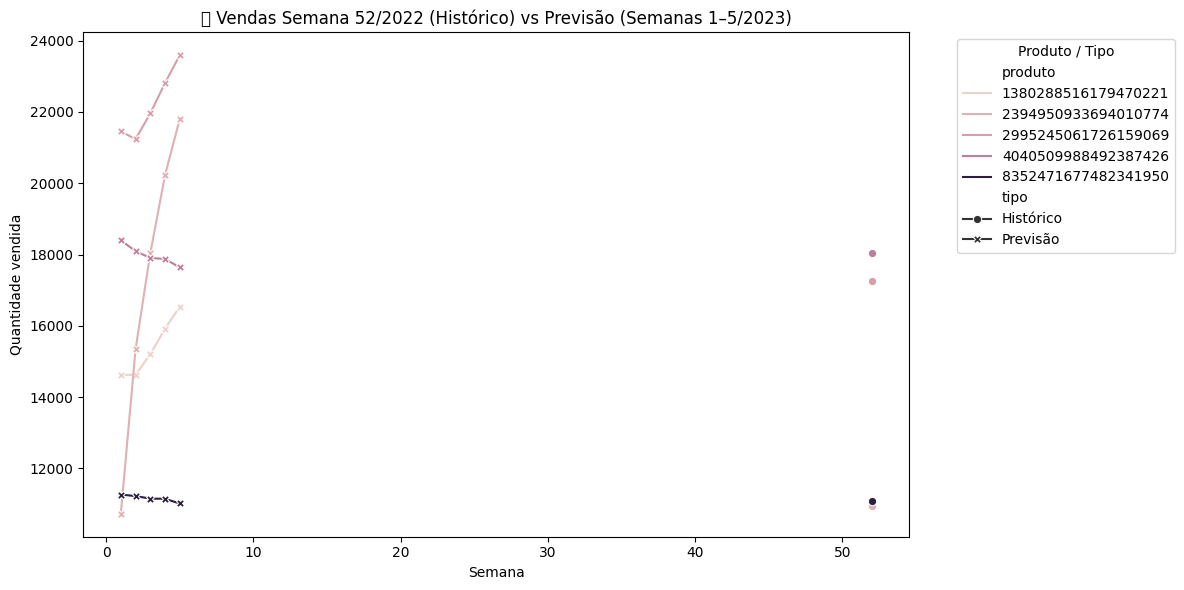

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona top 5 produtos mais vendidos na semana 52
top_produtos = (
    df_base.query("ano==2022 and semana==52")
    .groupby("produto")["quantidade"].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtra histórico (semana 52) e previsão (1–5 jan/2023) desses produtos
hist_sem52 = (
    df_base.query("ano==2022 and semana==52 and produto in @top_produtos")
    .groupby("produto")["quantidade"].sum()
    .reset_index()
)
hist_sem52["semana"] = 52
hist_sem52["ano"] = 2022
hist_sem52["tipo"] = "Histórico"

pred_top = (
    df_submissao.query("produto in @top_produtos")
    .groupby(["semana","produto"])["quantidade"].sum()
    .reset_index()
)
pred_top["ano"] = 2023
pred_top["tipo"] = "Previsão"

# Junta histórico e previsão
df_plot = pd.concat([hist_sem52, pred_top], ignore_index=True)

# Gráfico
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_plot,
    x="semana", y="quantidade",
    hue="produto", style="tipo", markers=True, dashes=False
)
plt.title("📊 Vendas Semana 52/2022 (Histórico) vs Previsão (Semanas 1–5/2023)")
plt.xlabel("Semana")
plt.ylabel("Quantidade vendida")
plt.legend(title="Produto / Tipo", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


/tmp/ipython-input-853982667.py:35: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


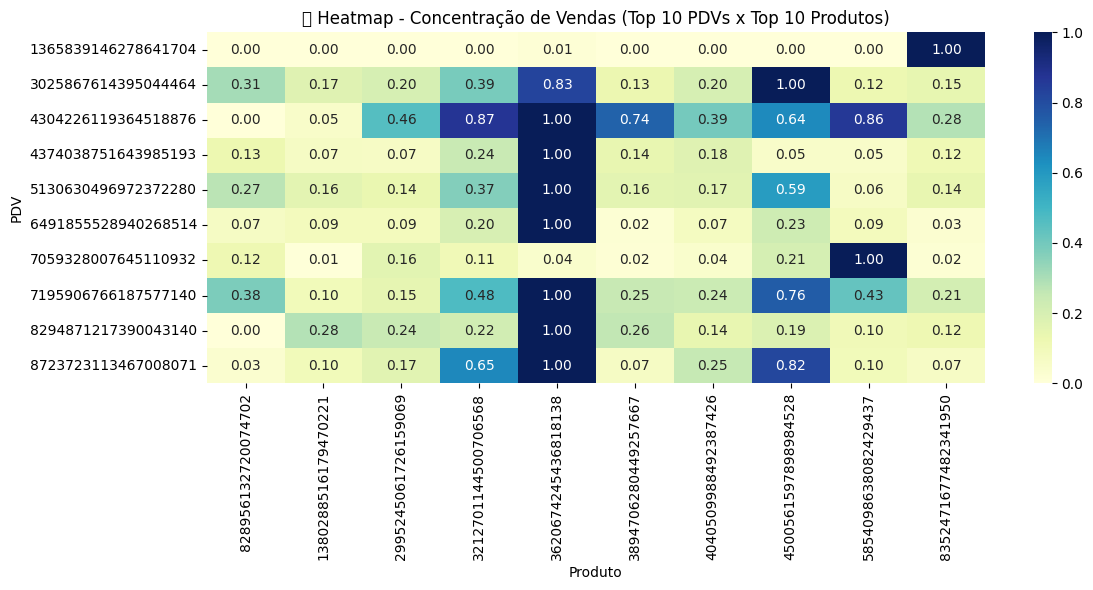

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona top 10 produtos e top 10 PDVs por volume
top_produtos = (
    df_base.groupby("produto")["quantidade"].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
top_pdvs = (
    df_base.groupby("pdv")["quantidade"].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtra dados
heatmap_data = (
    df_base.query("produto in @top_produtos and pdv in @top_pdvs")
    .groupby(["pdv", "produto"])["quantidade"]
    .sum()
    .unstack(fill_value=0)
)

# Normaliza para destacar padrões (opcional)
heatmap_data_norm = heatmap_data.div(heatmap_data.max(axis=1), axis=0)

# Plot
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data_norm, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)
plt.title("🔥 Heatmap - Concentração de Vendas (Top 10 PDVs x Top 10 Produtos)")
plt.xlabel("Produto")
plt.ylabel("PDV")
plt.tight_layout()
plt.show()


In [43]:
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ===============================
# 🔥 LightGBM com tuning rápido
# ===============================
lgb = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    num_leaves=128,
    min_data_in_leaf=50,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=3,
    lambda_l1=1.0,
    lambda_l2=1.0,
    random_state=42,
    n_jobs=-1
)

print("🔥 Treinando LightGBM Tunado...")
lgb.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="l2",
    callbacks=[
        lightgbm.early_stopping(200),
        lightgbm.log_evaluation(300)
    ]
)

# ===============================
# 📊 Avaliação no conjunto de validação
# ===============================
valid_pred = lgb.predict(X_valid)
mae_val = mean_absolute_error(y_valid, valid_pred)
rmse_val = mean_squared_error(y_valid, valid_pred) ** 0.5
wmape_val = wmape(y_valid, valid_pred)
smape_val = smape(y_valid, valid_pred)

print("📊 Métricas Tunadas:")
print(f"MAE   : {mae_val:.4f}")
print(f"RMSE  : {rmse_val:.4f}")
print(f"WMAPE : {wmape_val:.4f}")
print(f"sMAPE : {smape_val:.4f}")

# ===============================
# 🚀 Previsão iterativa Jan/2023
# ===============================
preds_all = []
state = hist_end.copy()
state[["lag_1","lag_2","lag_3","lag_4","roll3","roll8","w_since"]] = (
    state[["lag_1","lag_2","lag_3","lag_4","roll3","roll8","w_since"]].fillna(0)
)

for step in range(1, 6):  # semanas 1–5 jan/2023
    semana_fut = step
    feat = state.copy()
    feat["semana"] = semana_fut
    feat_use = feat[feature_cols]
    yhat = lgb.predict(feat_use)
    yhat = np.clip(yhat, 0, None)

    out = feat[["pdv","produto"]].copy()
    out["ano"] = 2023
    out["semana"] = semana_fut
    out["quantidade"] = yhat
    preds_all.append(out)

    # atualiza estado (lags + rollings)
    new_l1 = yhat
    state["lag_4"] = state["lag_3"]
    state["lag_3"] = state["lag_2"]
    state["lag_2"] = state["lag_1"]
    state["lag_1"] = new_l1
    state["roll3"] = 0.5*state["roll3"] + 0.5*new_l1
    state["roll8"] = 0.8*state["roll8"] + 0.2*new_l1
    state["w_since"] = np.where(new_l1 > 0, 1.0, state["w_since"]+1.0)

df_pred = pd.concat(preds_all, ignore_index=True)

# ===============================
# 📂 Formatação final + salvar
# ===============================
df_pred["quantidade"] = np.round(df_pred["quantidade"]).astype(int)
df_pred["pdv"] = pd.to_numeric(df_pred["pdv"], errors="coerce").astype("Int64")
df_pred["produto"] = pd.to_numeric(df_pred["produto"], errors="coerce").astype("Int64")

df_submissao = df_pred[["semana","pdv","produto","quantidade"]].copy()

# 🔹 Ordena antes de salvar
df_submissao = df_submissao.sort_values(["semana","pdv","produto"]).reset_index(drop=True)

print("Total linhas (antes de salvar):", len(df_submissao))
assert len(df_submissao) <= 1_500_000, "Ainda acima do limite de linhas. Ajuste filtros."

out_csv = "/content/drive/MyDrive/desafiodata/submissao3.csv"
out_parquet = "/content/drive/MyDrive/desafiodata/submissao3.parquet"
df_submissao.to_csv(out_csv, sep=";", index=False, encoding="utf-8")
df_submissao.to_parquet(out_parquet, index=False)

print("✅ Submissão pronta e ordenada!")
print("CSV:", out_csv)
print("PARQUET:", out_parquet)
print(df_submissao.head())


🔥 Treinando LightGBM Tunado...
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_b

AssertionError: Ainda acima do limite de linhas. Ajuste filtros.

In [44]:
# 🔹 Garante apenas pares ativos na semana 52/2022
ativos_sem52 = df_base.query("ano==2022 and semana==52")[["pdv","produto"]].drop_duplicates()

df_submissao = df_submissao.merge(ativos_sem52, on=["pdv","produto"], how="inner")

print("Total linhas (após filtrar ativos sem-52):", len(df_submissao))
assert len(df_submissao) <= 1_500_000, "Ainda acima do limite, precisamos reduzir mais."


Total linhas (após filtrar ativos sem-52): 551915


In [45]:
# ============================
#  💾 Salva submissão final
# ============================
out_csv = "/content/drive/MyDrive/desafiodata/submissao3.csv"
out_parquet = "/content/drive/MyDrive/desafiodata/submissao3.parquet"

df_submissao.to_csv(out_csv, sep=";", index=False, encoding="utf-8")
df_submissao.to_parquet(out_parquet, index=False)

print("✅ Submissão 3 pronta!")
print("CSV:", out_csv)
print("PARQUET:", out_parquet)
print(df_submissao.head())


✅ Submissão 3 pronta!
CSV: /content/drive/MyDrive/desafiodata/submissao3.csv
PARQUET: /content/drive/MyDrive/desafiodata/submissao3.parquet
   semana               pdv              produto  quantidade
0       1  2039259415232404   470856825659366361           5
1       1  2039259415232404   637448570435263100           2
2       1  2039259415232404  1152772499033912340           5
3       1  2039259415232404  1220804478981589450           5
4       1  2039259415232404  1561521087257031888          22


In [46]:
# Confere se df_submissao ainda existe no ambiente
"df_submissao" in globals()


True

In [47]:
# Confere tamanho antes de salvar
print("Total linhas para submissão:", len(df_submissao))
assert len(df_submissao) <= 1_500_000, "❌ Ainda acima do limite de linhas!"

# Caminhos de saída
out_csv = "/content/drive/MyDrive/desafiodata/submissao3.csv"
out_parquet = "/content/drive/MyDrive/desafiodata/submissao3.parquet"

# Salvar arquivos
df_submissao.to_csv(out_csv, sep=";", index=False, encoding="utf-8")
df_submissao.to_parquet(out_parquet, index=False)

print("✅ Arquivos de submissão salvos!")
print("CSV:", out_csv)
print("Parquet:", out_parquet)


Total linhas para submissão: 551915
✅ Arquivos de submissão salvos!
CSV: /content/drive/MyDrive/desafiodata/submissao3.csv
Parquet: /content/drive/MyDrive/desafiodata/submissao3.parquet
